In [38]:
import os
import boto3
import os
results = {}
session = boto3.Session(profile_name='default')
client = session.client('rekognition', region_name="eu-central-1")
bucket = 'my-hosted-content87'

for path in os.listdir("data/experiments/disabled/disabled-people"):
    img=os.path.join("experiments/disabled/disabled-people/",path)
    response = client.detect_labels(Image={'S3Object':{'Bucket':bucket,'Name':img}},
        MaxLabels=20,)
    results[path]=response["Labels"]

InvalidImageFormatException: An error occurred (InvalidImageFormatException) when calling the DetectLabels operation: Request has invalid image format

In [34]:
path

'experiments/weight/thin/thinwoman6.jpg'

In [42]:
import os
import boto3
import json
results = {}
session = boto3.Session(profile_name='default')
client = session.client('rekognition', region_name="eu-central-1")
bucket = 'my-hosted-content87'
for attr in os.listdir("data/experiments")[4:]:
    for category in os.listdir("data/experiments/"+attr):
        results= {}
        for img in os.listdir("data/experiments/"+attr+"/"+category):
            path = os.path.join("experiments/",attr+"/",category+"/",img)
            try:
                response = client.detect_labels(Image={'S3Object':{'Bucket':bucket,'Name':path}},
            MaxLabels=20,)
            except:
                print("Error in ", path)
                continue
            results[path]=response["Labels"]
        file_name = attr+"_"+category+".json"
        with open (file_name, "w") as f:
            json.dump(results, f)
            f.close()

Error in  experiments/gender/career/office1_google.webp
Error in  experiments/gender/female/girl1_google.webp
Error in  experiments/gender/liberal-arts/writing3_google.webp
Error in  experiments/gender/male/grandpa1_google.webp
Error in  experiments/gender/male/grandpa4_google.webp
Error in  experiments/gender/male/grandpa6_google.webp
Error in  experiments/insect-flower/flower/daisy4_google.webp
Error in  experiments/insect-flower/flower/lily_google.webp
Error in  experiments/insect-flower/insect/gnat2_google.webp
Error in  experiments/intersectional/black/bf7.webp
Error in  experiments/intersectional/black/bm12.webp
Error in  experiments/intersectional/black-female/bf12.jpg
Error in  experiments/intersectional/black-female/bf7.webp
Error in  experiments/intersectional/black-male/bm12.webp
Error in  experiments/intersectional/female/bf7.webp
Error in  experiments/intersectional/male/bm12.webp
Error in  experiments/religion/judaism/jew1_google.webp
Error in  experiments/sexuality/strai

In [44]:
vocab

{'Head': {'parents': ['Person'],
  'categories': ['Person Description'],
  'aliases': []},
 'Person': {'parents': [],
  'categories': ['Person Description'],
  'aliases': ['Human']},
 'Face': {'parents': ['Head', 'Person'],
  'categories': ['Person Description'],
  'aliases': []},
 'Photography': {'parents': [],
  'categories': ['Hobbies and Interests'],
  'aliases': ['Photo']},
 'Portrait': {'parents': ['Face', 'Head', 'Person', 'Photography'],
  'categories': ['Hobbies and Interests'],
  'aliases': []},
 'Adult': {'parents': ['Person'],
  'categories': ['Person Description'],
  'aliases': []},
 'Male': {'parents': ['Person'],
  'categories': ['Person Description'],
  'aliases': []},
 'Man': {'parents': ['Adult', 'Male', 'Person'],
  'categories': ['Person Description'],
  'aliases': []},
 'Mouth': {'parents': ['Body Part', 'Person'],
  'categories': ['Person Description'],
  'aliases': ['Lip']},
 'Teeth': {'parents': ['Body Part', 'Mouth', 'Person'],
  'categories': ['Person Descript

In [47]:
with open("labels(BP).json", "r") as f:
    vocab = json.load(f)
    f.close()
vocab = list(vocab.keys())
for path in os.listdir("results"):
    with open ("results/"+path, "r") as f:
        data = json.load(f)
        f.close()
    for key, item in data.items():
        labels = set([label["Name"] for label in item])
        for i in labels:
            if i not in vocab:
                vocab.append(i)

In [51]:
import pandas as pd
gender = pd.read_csv("sample_balanced.csv")

In [54]:
with open("amazon_celebA.json", "r") as f:
    amazon = json.load(f)
    f.close()

In [60]:
len(vocab)

875

In [57]:
len(amazon.keys())

2180

In [62]:
import numpy as np
full_results={}
for key, item in amazon.items():
    tmp = np.zeros(len(vocab))
    for value in item:
        label = value["Name"]
        score = value["Confidence"]/100
        index = vocab.index(label)
        tmp[index]=score
    full_results[key]=tmp
        

In [64]:
df=pd.DataFrame(full_results).T

In [66]:
df

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
113519.jpg,0.999946,0.999946,0.999922,0.999419,0.999419,0.988758,0.988758,0.988758,0.987969,0.987969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
034676.jpg,0.999991,0.999991,0.999991,0.999991,0.999991,0.988760,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165384.jpg,0.999280,0.999280,0.999280,0.999280,0.999280,0.987154,0.987154,0.987154,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165688.jpg,0.999908,0.999908,0.999908,0.999908,0.999908,0.950046,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180161.jpg,0.999970,0.999970,0.999970,0.999970,0.999970,0.983720,0.000000,0.000000,0.846994,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157033.jpg,0.995519,1.000000,0.995519,0.995519,0.995519,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
024812.jpg,0.000000,0.999178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
016112.jpg,0.987171,0.987171,0.987171,0.987171,0.987171,0.950704,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
030828.jpg,1.000000,1.000000,1.000000,0.999903,0.999903,0.985842,0.985842,0.985842,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
gender[gender.ImageName==index].Gender.values[0]

'male'

In [83]:
gen=[]
for index in df.index:
    g = gender[gender.ImageName==index].Gender.values[0]
    gen.append(g)
df["Gender"]=gen

In [84]:
df

,0,1,2,3,4,5,6,7,8,9,...,866,867,868,869,870,871,872,873,874,Gender
113519.jpg,0.999946,0.999946,0.999922,0.999419,0.999419,0.988758,0.988758,0.988758,0.987969,0.987969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
034676.jpg,0.999991,0.999991,0.999991,0.999991,0.999991,0.988760,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
165384.jpg,0.999280,0.999280,0.999280,0.999280,0.999280,0.987154,0.987154,0.987154,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male
165688.jpg,0.999908,0.999908,0.999908,0.999908,0.999908,0.950046,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
180161.jpg,0.999970,0.999970,0.999970,0.999970,0.999970,0.983720,0.000000,0.000000,0.846994,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157033.jpg,0.995519,1.000000,0.995519,0.995519,0.995519,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
024812.jpg,0.000000,0.999178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
016112.jpg,0.987171,0.987171,0.987171,0.987171,0.987171,0.950704,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female
030828.jpg,1.000000,1.000000,1.000000,0.999903,0.999903,0.985842,0.985842,0.985842,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,male


In [87]:
df[df.Gender=="female"].to_csv("embedded/celeb_A_female.csv", index=False)

In [128]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    mean=np.mean(x)
    std=np.std(x)
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - mean
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / std
 
# extract x and y coordinates representing the positions of the images on T-SNE plot

def tsne_graph(df1,df2,df3,df4, labels):
  length=(len(df1), len(df2), len(df3), len(df4))
  marker=([0,length[0]],[length[0],length[0]+length[1]],[length[0]+length[1],length[0]+length[1]+length[2]],[length[0]+length[1]+length[2],length[0]+length[1]+length[2]+length[3]])
  features=np.concatenate([df1,df2,df3,df4])
  tsne = TSNE(n_components=2).fit_transform(features)
  tx = tsne[:, 0]
  ty = tsne[:, 1]
  tx = scale_to_01_range(tx)
  ty = scale_to_01_range(ty)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  colors = ["r","g","c","y"]
  # for every class, we'll add a scatter plot separately
  for i, label in enumerate(labels):
      # find the samples of the current class in the data
      indices = []
      start, end = marker[i]
      for index in range(start, end):
        indices.append(index)
      # extract the coordinates of the points of this class only
      current_tx = np.take(tx, indices)
      current_ty = np.take(ty, indices)
      # add a scatter plot with the corresponing color and label
      ax.scatter(current_tx, current_ty, c=colors[i], label=label)
  
  # build a legend using the labels we set previously
  ax.legend(loc='best')
  
  # finally, show the plot
  plt.show()

In [88]:
import numpy as np
for path in os.listdir("results"):
    with open ("results/"+path, "r") as f:
        data = json.load(f)
        f.close()
    full_results={}
    for key, item in data.items():
        tmp = np.zeros(len(vocab))
        for value in item:
            label = value["Name"]
            score = value["Confidence"]/100
            index = vocab.index(label)
            tmp[index]=score
        full_results[key]=tmp
    df=pd.DataFrame(full_results).T
    path = path.split(".")[0]
    df.to_csv("embedded/"+path+".csv", index=False)

In [150]:
from weat.weat.test import Test

X= pd.read_csv("embedded/insect-flower_flower.csv")
Y= pd.read_csv("embedded/insect-flower_insect.csv").iloc[:33]
A = pd.read_csv("embedded/valence_pleasant.csv")
B = pd.read_csv("embedded/valence_unpleasant.csv")

In [151]:
test = Test(X,Y,A,B)
test.run()


04/04 10:38:58 AM: Computing cosine similarities...
04/04 10:38:58 AM: Null hypothesis: no difference between X and Y in association to attributes A and B
04/04 10:38:58 AM: Computing pval...
04/04 10:38:58 AM: Using non-parametric test
04/04 10:38:58 AM: Drawing 9999 samples (and biasing by 1)
04/04 10:38:58 AM: pval: 0.0001
04/04 10:38:58 AM: computing effect size...
04/04 10:38:58 AM: esize: 1.68111


(1.6811092201308977, 0.0001)

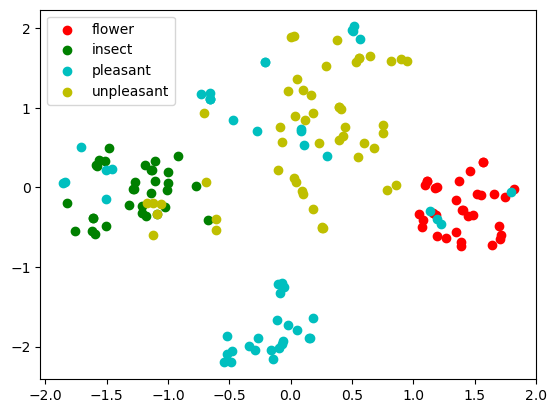

In [152]:
tsne_graph(X,Y,A,B,["flower","insect","pleasant","unpleasant"])

In [146]:
X = pd.read_csv("embedded/celeb_A_male.csv").drop(columns=["Gender"]).sample(50, random_state=2)
Y = pd.read_csv("embedded/celeb_A_female.csv").drop(columns=["Gender"]).sample(50, random_state=2)
A = pd.read_csv("embedded/gender_career.csv")
B = pd.read_csv("embedded/gender_family.csv")

In [147]:
test = Test(X,Y,A,B)
test.run()

04/04 10:38:18 AM: Computing cosine similarities...
04/04 10:38:18 AM: Null hypothesis: no difference between X and Y in association to attributes A and B
04/04 10:38:18 AM: Computing pval...
04/04 10:38:18 AM: Using non-parametric test
04/04 10:38:18 AM: Drawing 9999 samples (and biasing by 1)
04/04 10:38:18 AM: pval: 0.4781
04/04 10:38:18 AM: computing effect size...
04/04 10:38:18 AM: esize: 0.0116052


(0.011605171858874764, 0.4781)

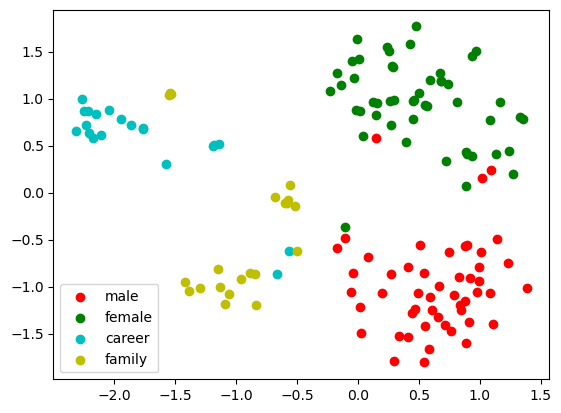

In [149]:
tsne_graph(X,Y,A,B,["male","female","career","family"])

In [139]:
X = pd.read_csv("embedded/celeb_A_male.csv").drop(columns=["Gender"]).sample(50, random_state=2)
Y = pd.read_csv("embedded/celeb_A_female.csv").drop(columns=["Gender"]).sample(50, random_state=2)
A = pd.read_csv("embedded/gender_science.csv")
B = pd.read_csv("embedded/gender_liberal-arts.csv")
test = Test(X,Y,A,B)
test.run()

04/04 10:36:59 AM: Computing cosine similarities...
04/04 10:36:59 AM: Null hypothesis: no difference between X and Y in association to attributes A and B
04/04 10:36:59 AM: Computing pval...
04/04 10:36:59 AM: Using non-parametric test
04/04 10:36:59 AM: Drawing 9999 samples (and biasing by 1)
04/04 10:36:59 AM: pval: 1
04/04 10:36:59 AM: computing effect size...
04/04 10:36:59 AM: esize: -0.687463


(-0.6874628778032302, 1.0)

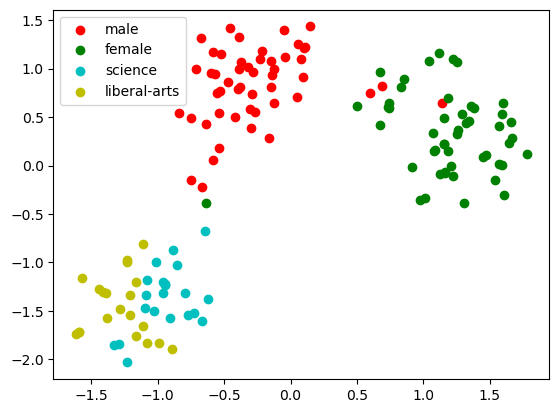

In [141]:
tsne_graph(X,Y,A,B,["male","female","science","liberal-arts"])

In [135]:
X = pd.read_csv("embedded/celeb_A_male.csv").drop(columns=["Gender"]).sample(50, random_state=2)
Y = pd.read_csv("embedded/celeb_A_female.csv").drop(columns=["Gender"]).sample(50, random_state=2)
A = pd.read_csv("embedded/valence_unpleasant.csv")
B = pd.read_csv("embedded/valence_pleasant.csv")
test = Test(X,Y,A,B)
test.run()

04/04 10:36:05 AM: Computing cosine similarities...
04/04 10:36:05 AM: Null hypothesis: no difference between X and Y in association to attributes A and B
04/04 10:36:05 AM: Computing pval...
04/04 10:36:05 AM: Using non-parametric test
04/04 10:36:05 AM: Drawing 9999 samples (and biasing by 1)
04/04 10:36:05 AM: pval: 0.0002
04/04 10:36:05 AM: computing effect size...
04/04 10:36:05 AM: esize: 0.819882


(0.8198817853150344, 0.0002)

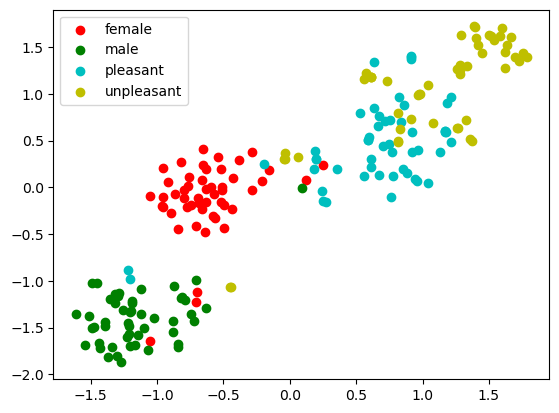

In [136]:
tsne_graph(X,Y,A,B,["female","male","pleasant","unpleasant"])

In [153]:
X = pd.read_csv("embedded/intersectional_white.csv").iloc[:38]
Y = pd.read_csv("embedded/intersectional_black.csv")
A = pd.read_csv("embedded/weapon_tool-modern.csv")
B = pd.read_csv("embedded/weapon_weapon-modern.csv")
test = Test(X,Y,A,B)
test.run()

04/04 11:18:02 AM: Computing cosine similarities...
04/04 11:18:02 AM: Null hypothesis: no difference between X and Y in association to attributes A and B
04/04 11:18:02 AM: Computing pval...
04/04 11:18:02 AM: Using non-parametric test
04/04 11:18:02 AM: Drawing 9999 samples (and biasing by 1)
04/04 11:18:02 AM: pval: 0.001
04/04 11:18:02 AM: computing effect size...
04/04 11:18:02 AM: esize: 0.401996


(0.4019955505669288, 0.001)

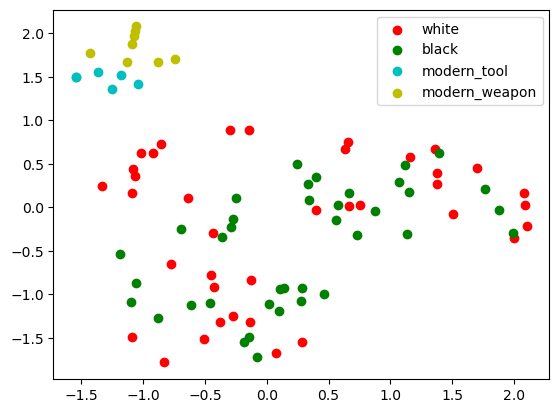

In [129]:
tsne_graph(X,Y,A,B,["white","black","modern_tool","modern_weapon"])

In [ ]:
from sklearn.decomposition import PCA

pca = PAC